# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

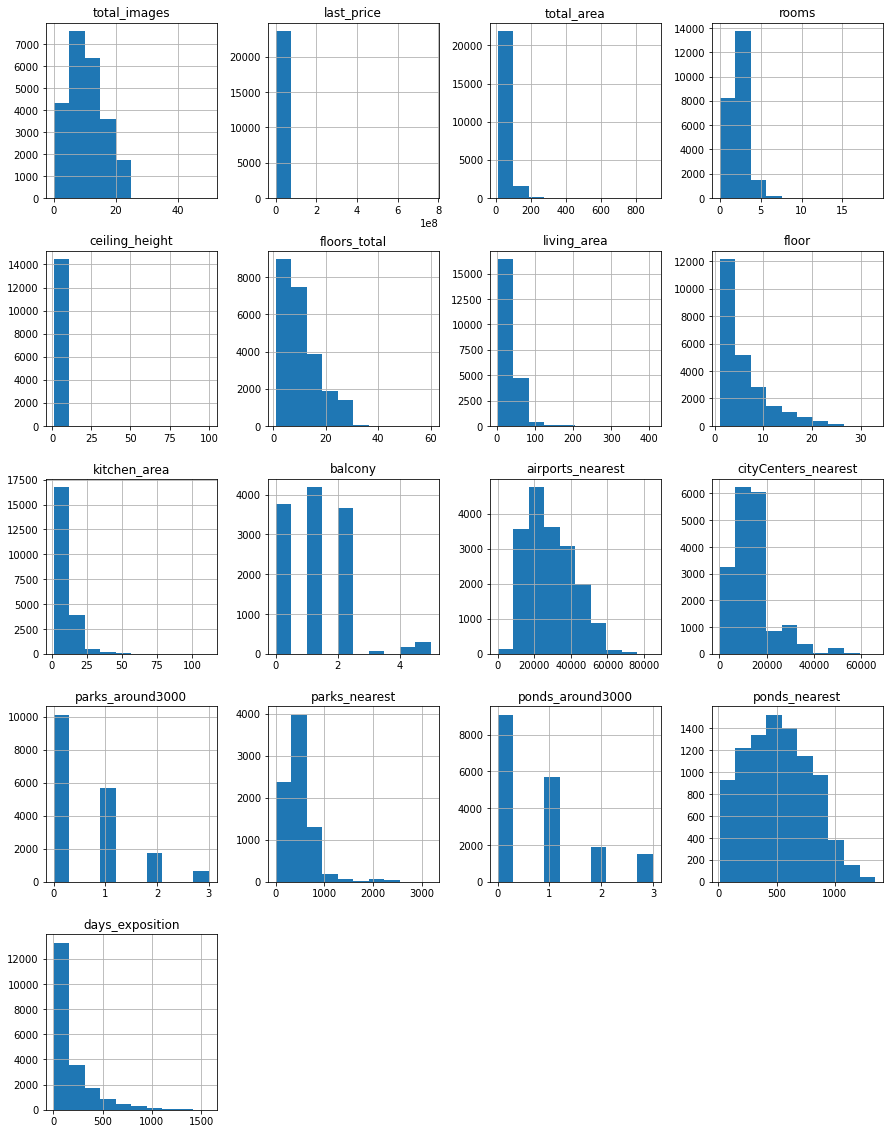

In [4]:
data.hist(figsize=(15, 20));
plt.show()

### Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [156]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

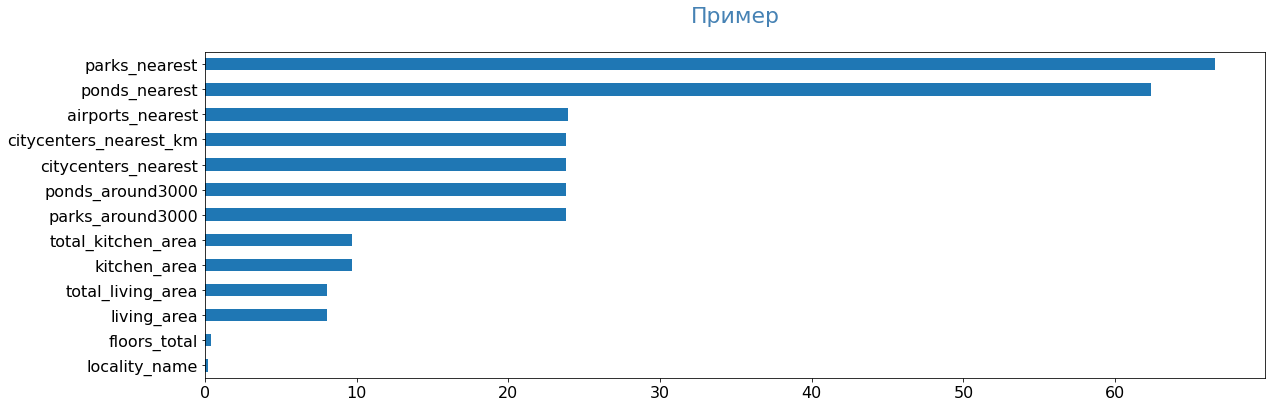

In [157]:
pass_value_barh(data)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
data['balcony'] = data['balcony'].fillna(0)

**Пропуски**  в колонке балконы заменили на 0 , потому что пропуски скорее всего подразумевают отсутсвие балкона

In [10]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [11]:
data['floors_total'].dropna(inplace=True)

In [12]:
data['floors_total'] =  data['floors_total'].astype('Int8')

**Кол-во этажей**

In [13]:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

In [14]:
data['days_exposition'] = data['days_exposition'].fillna(0)

In [15]:
data['days_exposition'].value_counts()

0       3181
45       880
60       538
7        234
30       208
        ... 
1572       1
1396       1
1268       1
1252       1
1391       1
Name: days_exposition, Length: 1142, dtype: Int64

In [16]:
#data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
#data['days_exposition'] = data['days_exposition'].astype('int')
#data['days_exposition'].isna().sum()

**Дни публикации** Заменим пропуски и поменяем тип данных

In [17]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [18]:
data.loc[(data['ceiling_height'] > 23.9) & (data['ceiling_height'] < 50), 'ceiling_height'] = \
data['ceiling_height'] / 10

**Высота потолков**

In [19]:
data['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

**Жилая зона**

In [20]:
data['is_apartment'].unique()
data['is_apartment'] = data['is_apartment'].fillna(False)

**Апартаменты** Тут булевые значения,заменим на False

In [21]:
data['kitchen_area'].unique()

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

Оставим null

**Наличие кухни** Можно заполнить нулями,потому что есть квартиры без кухни

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Названия.** Нужно заменить ё на е,чтобы избавиться от дубликатов,а так-же можем поменять городской поселок на поселок городского типа

In [23]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок') 
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
data['locality_name'].dropna(inplace=True)

In [24]:
# check
data.locality_name.unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

**Близость к центру города** Во первых приведем к нижнему регистру cityCenters_nearest|

In [25]:
data = data.rename(columns = {'cityCenters_nearest': 'citycenters_nearest'})

**Заметка** Кстати значения показателя "близость к аэропорту" почти такие-же

In [26]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

Не во всех стобцах должны отсутсвовать пропуски, это не приведет нас к точному выводу

 **Переведем столбец с датой в формат даты без времени, т.к. время не указано**


In [27]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int8          
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [29]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.738456,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,156.608844
std,5.682529,1.088701e+07,35.654083,1.078405,0.893702,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,213.546873
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,22.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,74.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Цены квартир** разберемся теперь с ними

In [30]:
print('Квартир стоимостью 0:', data.query('last_price == 0')['last_price'].count())
print('Квартир стоимостью меньше 100.000:', data.query('last_price < 1e+05')['last_price'].count())
print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())

print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())
data['last_price'] = np.floor(pd.to_numeric(data['last_price'], errors='coerce')).astype('int64')
data.drop(index=data.query('last_price > 1e+08').index,inplace=True)
data.info()

Квартир стоимостью 0: 0
Квартир стоимостью меньше 100.000: 1
Квартир стоимостью больше 100.000.000: 37
Квартир стоимостью больше 100.000.000: 37
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  int64         
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        14479 non-null  float64       
 6   floors_total          23576 non-null  Int8          
 7   living_area           21764 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          23662 non-null  bool          
 10  studio                23662 non-null  bool   

Уберем кв. стоимостью больше 100.000.000 и лучше построим график,чтобы не анализировать "на глазок"

Text(0.5, 1.0, 'last_price')

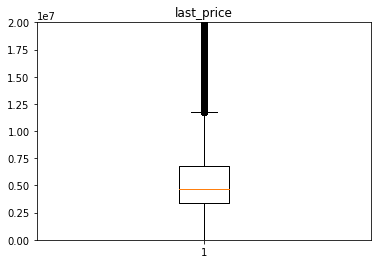

In [31]:
#data.hist('last_price', bins=50, range=(0,2e+07))
#data.hist('last_price', bins=50, range=(0,4e+06))
#data.drop(index=data.query('last_price < 1e+05').index,inplace=True)
plt.ylim(0,2e+07)
plt.boxplot(data['last_price'])
plt.title('last_price')

График нормальный,без выбросов

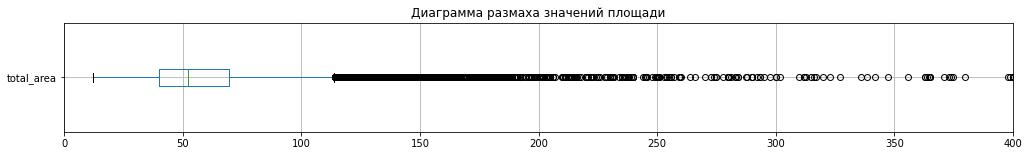

In [32]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

**Площадь квартиры** Минимальный размер квартиры 12 м^2, но есть квартиры с общей площадью 900 м^2. Значение довльно большое,скорее всего это дорогая недвижимость. Нужно удалить.

In [33]:
print('Квартир площадью менее 10 м^2:',data.query('total_area < 10')['total_area'].count()) 
print('Квартир площадью более 500 м^2:',data.query('total_area > 500')['total_area'].count())

Квартир площадью менее 10 м^2: 0
Квартир площадью более 500 м^2: 3


In [34]:
data.drop(index=data.query('total_area > 500').index,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23659 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23659 non-null  int64         
 1   last_price            23659 non-null  int64         
 2   total_area            23659 non-null  float64       
 3   first_day_exposition  23659 non-null  datetime64[ns]
 4   rooms                 23659 non-null  int64         
 5   ceiling_height        14477 non-null  float64       
 6   floors_total          23573 non-null  Int8          
 7   living_area           21761 non-null  float64       
 8   floor                 23659 non-null  int64         
 9   is_apartment          23659 non-null  bool          
 10  studio                23659 non-null  bool          
 11  open_plan             23659 non-null  bool          
 12  kitchen_area          21387 non-null  float64       
 13  balcony         

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

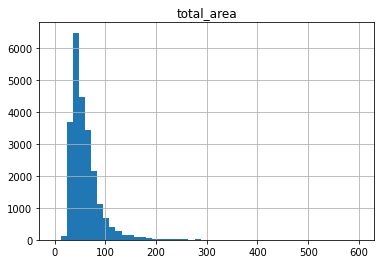

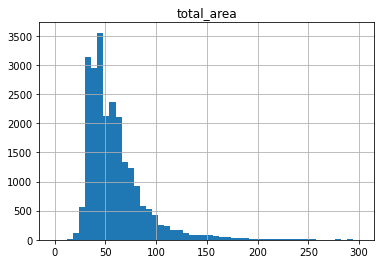

In [35]:
data.hist('total_area', bins=50, range=(0,600))
data.hist('total_area', bins=50, range=(0,300))

**Комнаты**

Максимальное значение комнат - 19, а минимальное - 0 (думаю,что это студии)

In [36]:
print('Квартиры без комнат:',data.query('rooms == 0')['rooms'].count())
print('Квартиры без комнат и студии:',data.query('rooms == 0 and studio')['rooms'].count()) 
print('Квартиры без комнат и апартаменты:',data.query('rooms == 0 and is_apartment')['rooms'].count()) 
print('Квартиры без комнат и свободная планировка:',data.query('rooms == 0 and open_plan')['rooms'].count())
print('Квартиры без комнат не апартаменты и не свободная планировка:',data.query('rooms == 0 and ~open_plan and ~studio')['rooms'].count())
data.drop(index=data.query('rooms > 7').index,inplace=True)
data.info()

Квартиры без комнат: 197
Квартиры без комнат и студии: 138
Квартиры без комнат и апартаменты: 0
Квартиры без комнат и свободная планировка: 59
Квартиры без комнат не апартаменты и не свободная планировка: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23632 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23632 non-null  int64         
 1   last_price            23632 non-null  int64         
 2   total_area            23632 non-null  float64       
 3   first_day_exposition  23632 non-null  datetime64[ns]
 4   rooms                 23632 non-null  int64         
 5   ceiling_height        14458 non-null  float64       
 6   floors_total          23546 non-null  Int8          
 7   living_area           21735 non-null  float64       
 8   floor                 23632 non-null  int64         
 9   is_apartment          23632 non-null  boo

**Кол-во этажей**

In [37]:
print('Квартир в одноэтажных домах : ',data.query('floors_total == 1')['floors_total'].count())
print('Квартир в 30+ этажных домах : ',data.query('floors_total > 30')['floors_total'].count())

Квартир в одноэтажных домах :  25
Квартир в 30+ этажных домах :  32


In [38]:
data.drop(index=data.query('floors_total > 30').index,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23600 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23600 non-null  int64         
 1   last_price            23600 non-null  int64         
 2   total_area            23600 non-null  float64       
 3   first_day_exposition  23600 non-null  datetime64[ns]
 4   rooms                 23600 non-null  int64         
 5   ceiling_height        14444 non-null  float64       
 6   floors_total          23514 non-null  Int8          
 7   living_area           21704 non-null  float64       
 8   floor                 23600 non-null  int64         
 9   is_apartment          23600 non-null  bool          
 10  studio                23600 non-null  bool          
 11  open_plan             23600 non-null  bool          
 12  kitchen_area          21334 non-null  float64       
 13  balcony         

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

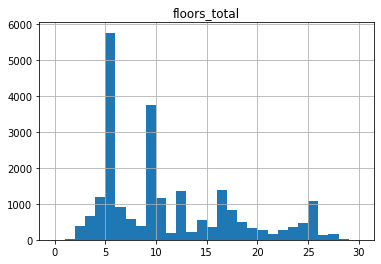

In [39]:
data.hist('floors_total', bins=30,range=(0,30))

**Высота потолков** Построю гистограмму для детального анализа

In [40]:
data['ceiling_height'].describe()

count    14444.000000
mean         2.736065
std          0.893679
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

2.50    3520
2.60    1647
2.70    1577
3.00    1107
2.80     989
        ... 
3.59       1
3.76       1
5.20       1
2.49       1
4.65       1
Name: ceiling_height, Length: 172, dtype: int64

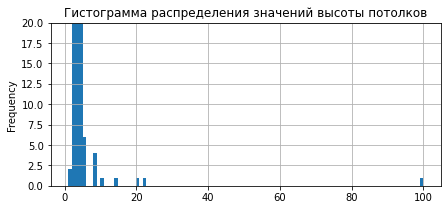

In [41]:
data['ceiling_height'].plot(kind='hist', bins=100,
                        title='Гистограмма распределения значений высоты потолков',
                        grid=True,
                        figsize=(7,3),
                        ylim=(0,20),
                        ylabel='ceiling_height',
                        fontsize=10)
data['ceiling_height'].sort_values().value_counts()

Присутствуют аномалии, подробно изучу в разделе исследовательский анализ данных.

Необходимо заменить пропушенные значения на типичные, таким может быть медиана или среднее. Выведу на экран список типичных значений, используя метод describe()

In [42]:
data['ceiling_height'].describe()

count    14444.000000
mean         2.736065
std          0.893679
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Медиана и среднее отличаются, но не сильно 2,68 и 2,65 соответственно, можно использомать любое из них. Заполню пропуски медианой и проверю результат.

In [43]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

**Жилая площадь кв.**

Жилая площадь в 2 м^2 явно выбивается из всей выборки. Минимальная жилая площадь на человека по СНиПу - 10 м, поэтому разумно убрать квартиры, которые не соотвуствуют этому параметру. Также уберем жилые площади свыше 200 м^2.

In [44]:
print('Жилая площадь меньше 10 м^2:',data.query('living_area < 10')['living_area'].count())
print('Жилая площадь больше общей:',data.query('living_area > total_area')['living_area'].count())
print('Жилая площадь больше 200 м^2:',data.query('living_area > 200')['living_area'].count())

Жилая площадь меньше 10 м^2: 25
Жилая площадь больше общей: 0
Жилая площадь больше 200 м^2: 14


In [45]:
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23561 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23561 non-null  int64         
 1   last_price            23561 non-null  int64         
 2   total_area            23561 non-null  float64       
 3   first_day_exposition  23561 non-null  datetime64[ns]
 4   rooms                 23561 non-null  int64         
 5   ceiling_height        23561 non-null  float64       
 6   floors_total          23475 non-null  Int8          
 7   living_area           21665 non-null  float64       
 8   floor                 23561 non-null  int64         
 9   is_apartment          23561 non-null  bool          
 10  studio                23561 non-null  bool          
 11  open_plan             23561 non-null  bool          
 12  kitchen_area          21298 non-null  float64       
 13  balcony         

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

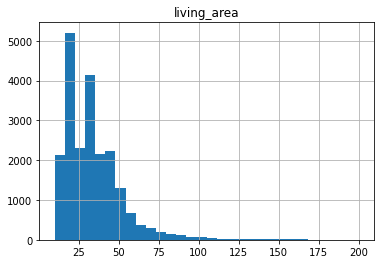

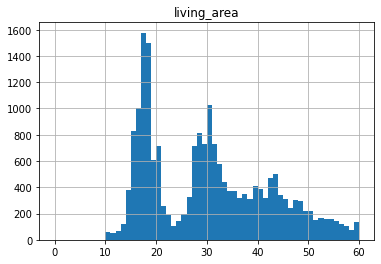

In [46]:
data.hist('living_area', bins=30)
data.hist('living_area', bins=60, range=(0,60))

**Этаж** Явных выбросов нет , но может быть несоотвестие этажу


In [47]:
data['floor_category'] = data.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 'другой'), axis=1
)

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

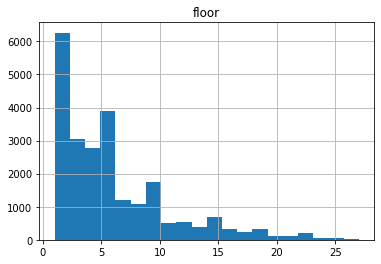

In [48]:
data.hist('floor',bins=20)

**Кухонная зона** Есть квартиры с маленькой кухонной зоной. Квартиры с площадью кухни больше 50 м^2 мало

In [49]:
print('Площадь кухни меньше 2 м^2: ',data.query('kitchen_area < 2')['living_area'].count())
print('Площадь кухни больше 50 м^2: ',data.query('kitchen_area > 50')['living_area'].count())
print('Площадь кухни больше общей: ',data.query('kitchen_area > total_area')['living_area'].count())

Площадь кухни меньше 2 м^2:  1
Площадь кухни больше 50 м^2:  33
Площадь кухни больше общей:  0


In [50]:
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)
data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23526 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23526 non-null  int64         
 1   last_price            23526 non-null  int64         
 2   total_area            23526 non-null  float64       
 3   first_day_exposition  23526 non-null  datetime64[ns]
 4   rooms                 23526 non-null  int64         
 5   ceiling_height        23526 non-null  float64       
 6   floors_total          23440 non-null  Int8          
 7   living_area           21631 non-null  float64       
 8   floor                 23526 non-null  int64         
 9   is_apartment          23526 non-null  bool          
 10  studio                23526 non-null  bool          
 11  open_plan             23526 non-null  bool          
 12  kitchen_area          21263 non-null  float64       
 13  balcony         

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

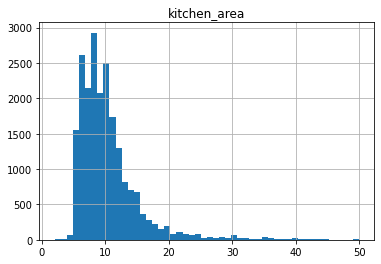

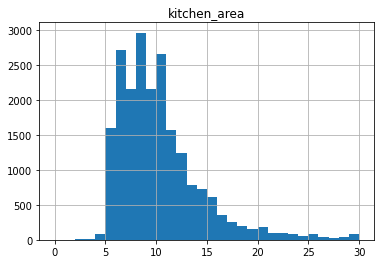

In [51]:
data.hist('kitchen_area', bins=50)
data.hist('kitchen_area', bins=30, range=(0,30))

**Количество дней когда объявление было актуально** График нормальный,но смущают давние обьявления

Объявление не было опубликовано:  3151
Объявлению больше 3 лет :  165


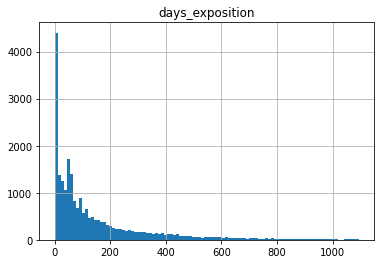

In [52]:
print('Объявление не было опубликовано: ',data.query('days_exposition == 0')['days_exposition'].count())

print('Объявлению больше 3 лет : ',data.query('days_exposition > 365*3')['days_exposition'].count())

data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)

data.hist('days_exposition', bins=100);
#data.info()

In [53]:
data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23361 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23361 non-null  int64         
 1   last_price            23361 non-null  int64         
 2   total_area            23361 non-null  float64       
 3   first_day_exposition  23361 non-null  datetime64[ns]
 4   rooms                 23361 non-null  int64         
 5   ceiling_height        23361 non-null  float64       
 6   floors_total          23277 non-null  Int8          
 7   living_area           21479 non-null  float64       
 8   floor                 23361 non-null  int64         
 9   is_apartment          23361 non-null  bool          
 10  studio                23361 non-null  bool          
 11  open_plan             23361 non-null  bool          
 12  kitchen_area          21108 non-null  float64       
 13  balcony         

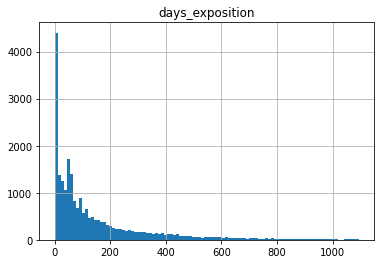

In [54]:
data.hist('days_exposition', bins=100);

**Близость к аэропорту** Только одна квартира находится слишком близко к аэропорту. Уберем ее.


In [55]:
print('Квартир слишком близко к аэропорту:',data.query('airports_nearest < 5000')['airports_nearest'].count())

Квартир слишком близко к аэропорту: 1


In [56]:
data.drop(index=data.query('airports_nearest < 5000').index,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23360 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23360 non-null  int64         
 1   last_price            23360 non-null  int64         
 2   total_area            23360 non-null  float64       
 3   first_day_exposition  23360 non-null  datetime64[ns]
 4   rooms                 23360 non-null  int64         
 5   ceiling_height        23360 non-null  float64       
 6   floors_total          23276 non-null  Int8          
 7   living_area           21478 non-null  float64       
 8   floor                 23360 non-null  int64         
 9   is_apartment          23360 non-null  bool          
 10  studio                23360 non-null  bool          
 11  open_plan             23360 non-null  bool          
 12  kitchen_area          21107 non-null  float64       
 13  balcony         

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

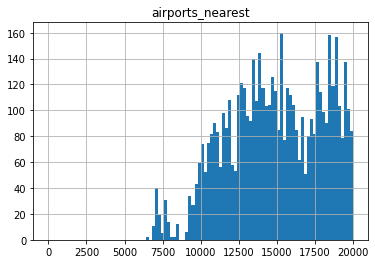

In [57]:
data.hist('airports_nearest', bins=100, range=(0,20000))

In [58]:
data.reset_index(drop=True,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23360 entries, 0 to 23359
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23360 non-null  int64         
 1   last_price            23360 non-null  int64         
 2   total_area            23360 non-null  float64       
 3   first_day_exposition  23360 non-null  datetime64[ns]
 4   rooms                 23360 non-null  int64         
 5   ceiling_height        23360 non-null  float64       
 6   floors_total          23276 non-null  Int8          
 7   living_area           21478 non-null  float64       
 8   floor                 23360 non-null  int64         
 9   is_apartment          23360 non-null  bool          
 10  studio                23360 non-null  bool          
 11  open_plan             23360 non-null  bool          
 12  kitchen_area          21107 non-null  float64       
 13  balcony         

**Явные дубликаты**

In [59]:
data.duplicated().sum()
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23360 entries, 0 to 23359
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23360 non-null  int64         
 1   last_price            23360 non-null  int64         
 2   total_area            23360 non-null  float64       
 3   first_day_exposition  23360 non-null  datetime64[ns]
 4   rooms                 23360 non-null  int64         
 5   ceiling_height        23360 non-null  float64       
 6   floors_total          23276 non-null  Int8          
 7   living_area           21478 non-null  float64       
 8   floor                 23360 non-null  int64         
 9   is_apartment          23360 non-null  bool          
 10  studio                23360 non-null  bool          
 11  open_plan             23360 non-null  bool          
 12  kitchen_area          21107 non-null  float64       
 13  balcony         

**Вывод**


По итогам предобработки данных можно сделать следующие выводы:

1.Названия столбцов приведены в соответствие с "змеиным_регистром".

2.Были определены и заполнены пропуски, где это уместно.

3.Заменены типы данных в некоторых столбцах.

В итоге, данные были средними по качеству,выполнили предобработку.
Присутвуют выбросы от которых необходимо избавится, чтобы верно трактовать графики, корреляции и зависимости.
А так-же кол-во неявных дубликатов было не так много,как я ожидал,с помощью этого ускорился процесс предобработки


#### check gap

In [158]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max','median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,739.00","22,739.00","22,739.00","22,739.00","22,739.00","20,910.00","20,531.00","22,739.00","22,658.00"
min,0.00,20.00,2.25,0.00,"430,000.00",10.00,5.00,1.00,1.00
max,7.00,250.00,4.00,"1,095.00","65,000,000.00",200.00,27.00,27.00,29.00
median,2.00,51.00,2.65,72.00,"4,590,000.00",30.00,9.00,4.00,9.00


**Аномалии ceiling_height**

In [61]:
data.drop(index=data.query('ceiling_height < 2.2').index,inplace=True)
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)
data.drop(index=data.query('ceiling_height > 36').index,inplace=True)


In [62]:
data['ceiling_height'].describe()

count    23299.000000
mean         2.691025
std          0.199864
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

**Аномалии total_area**

In [63]:
data.drop(index=data.query('total_area<20').index,inplace=True)
data.drop(index=data.query('total_area > 250').index,inplace=True)

In [64]:
data['total_area'].describe()

count    23222.000000
mean        58.551206
std         27.915450
min         20.000000
25%         40.000000
50%         51.900000
75%         68.900000
max        250.000000
Name: total_area, dtype: float64

Учел ваши комментарии ниже и отсеял редкостные значия по общей площади

**Аномалии days_exposition**

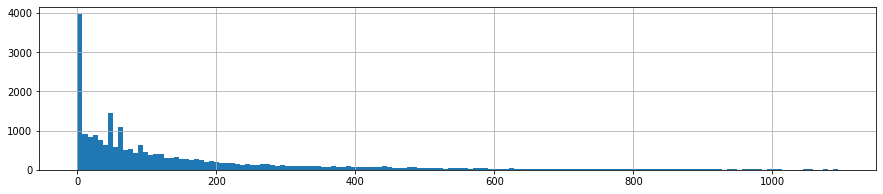

In [65]:
data.days_exposition.hist(bins = 150, figsize = (15,3));

Из графика видно выброс на 0 значении, но это просто неопубликованные обьявления

Text(0.5, 1.0, 'days_exposition')

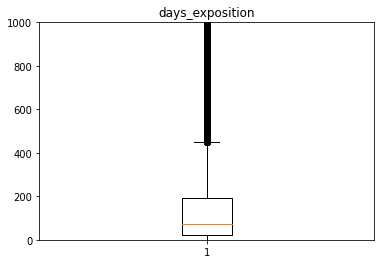

In [66]:
plt.ylim(0,1000)
plt.boxplot(data['days_exposition'])
plt.title('days_exposition')

А тут видно,что значения после , примерно 450, уже редкость,я уберу значения больше 2-ух лет,а так-же нулевые заглушки

In [67]:
data.drop(index=data.query('days_exposition > 1200').index,inplace=True)
#data.drop(index=data.query('days_exposition == 0').index,inplace=True)


<AxesSubplot:>

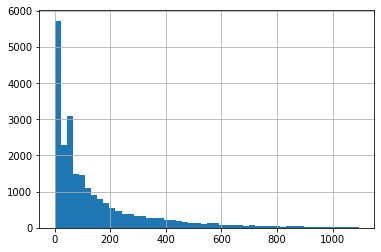

In [68]:
data['days_exposition'].hist(bins =50)

**Аномалии last_price**

In [69]:
data['last_price'].describe()

count    2.322200e+04
mean     6.022830e+06
std      5.563329e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.695000e+06
max      9.800000e+07
Name: last_price, dtype: float64

(10000.0, 99000000.0)

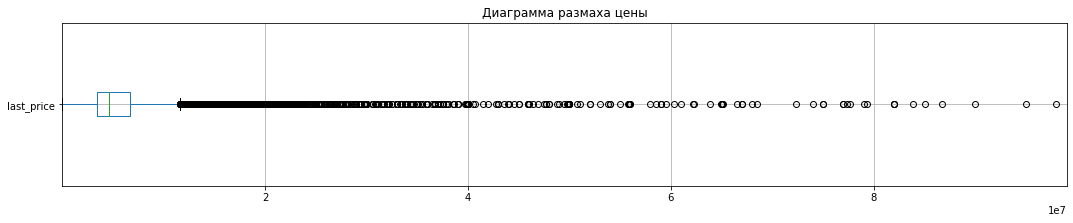

In [70]:
fig, ax = plt.subplots(figsize = (18,3))
ax = data[['last_price']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха цены')
ax.set_xlim(10000,99000000)

Большинство квартир лежат в диапазоне до 4 млн, не хочется терять много записей,так что уберу значения после 6.5 млн.

In [71]:
data.drop(index=data.query('last_price > 65_000_000').index,inplace=True)

(10000.0, 70000000.0)

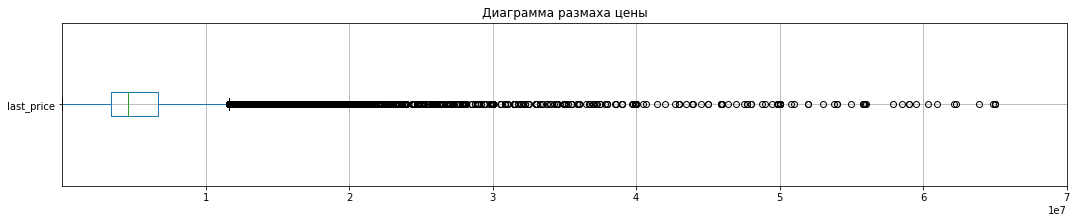

In [72]:
fig, ax = plt.subplots(figsize = (18,3))
ax = data[['last_price']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха цены')
ax.set_xlim(10000,70000000)

**Аномалии kitchen_area**

In [73]:
data['kitchen_area'].describe()

count    20989.000000
mean        10.318368
std          5.022990
min          2.000000
25%          7.000000
50%          9.000000
75%         11.900000
max         50.000000
Name: kitchen_area, dtype: float64

(2.0, 50.0)

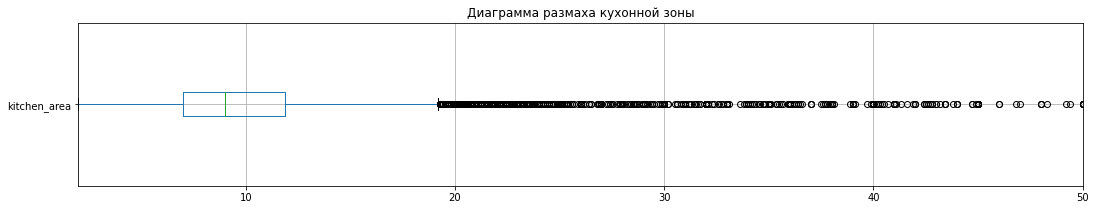

In [74]:
fig, ax = plt.subplots(figsize = (18,3))
ax = data[['kitchen_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха кухонной зоны')
ax.set_xlim(2,50)

Большинство значений находятся примерно после 15 , тоже не хочется терять много значенией,уберу значения после 27

In [75]:
data.drop(index=data.query('kitchen_area > 27').index,inplace=True)
data.drop(index=data.query('kitchen_area < 5').index,inplace=True)

Посмотрел,минимальный размер кухни (5 кв.м) буду ориентироваться на него

In [76]:
data['kitchen_area'].value_counts()

6.00     1287
10.00    1244
8.00     1103
9.00     1089
7.00     1057
         ... 
14.29       1
13.06       1
5.28        1
10.62       1
19.94       1
Name: kitchen_area, Length: 761, dtype: int64

In [77]:
data['kitchen_area'].describe()

count    20531.000000
mean         9.923595
std          3.812203
min          5.000000
25%          7.000000
50%          9.000000
75%         11.520000
max         27.000000
Name: kitchen_area, dtype: float64

In [78]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7893
2,7691
3,5546
4,1059
5,265
0,183
6,68
7,34


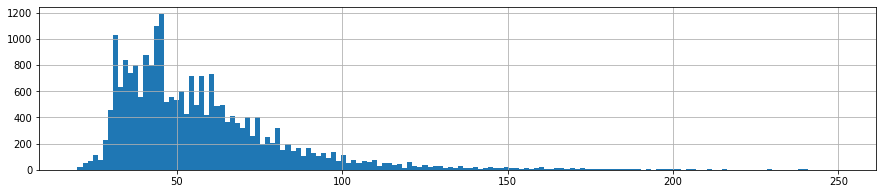

In [79]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

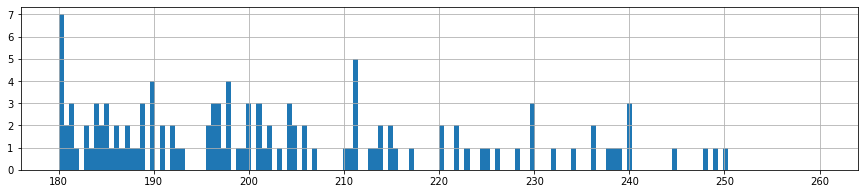

In [80]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,260));

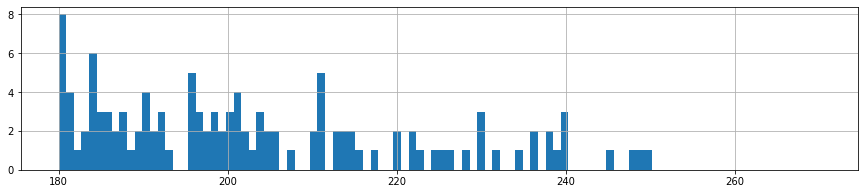

In [81]:
# check
data.total_area.hist(bins = 100, figsize = (15,3), range = (180,270));

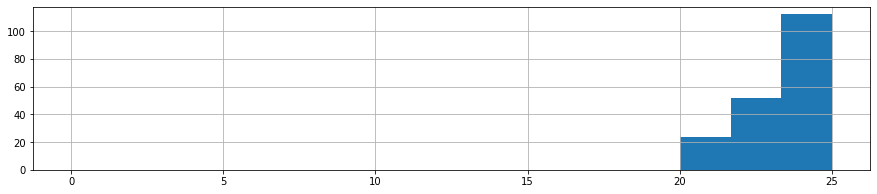

In [82]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [159]:


# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,21.90,2.40,0.00,"569,284.00",10.00,5.00,1.00,2.00
0.01,1.00,26.00,2.50,0.00,"1,000,000.00",13.21,5.00,1.00,2.00
0.5,2.00,51.00,2.65,72.00,"4,590,000.00",30.00,9.00,4.00,9.00
0.99,5.00,160.00,3.50,900.00,"25,500,000.00",98.00,23.41,23.00,26.00
0.9988,7.00,215.14,4.00,"1,074.71","49,642,960.00",146.86,26.27,26.00,27.00


In [160]:


# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,739.00","22,739.00","22,739.00","22,739.00","22,739.00","20,910.00","20,531.00","22,739.00","22,658.00"
min,0.00,20.00,2.25,0.00,"430,000.00",10.00,5.00,1.00,1.00
max,7.00,250.00,4.00,"1,095.00","65,000,000.00",200.00,27.00,27.00,29.00


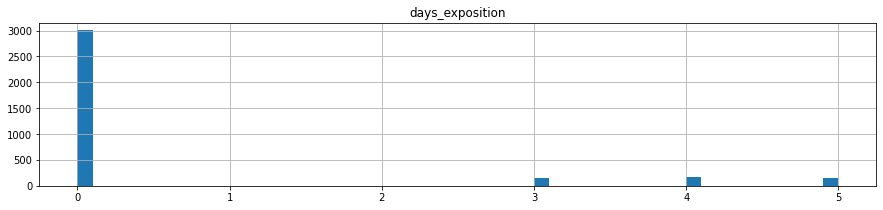

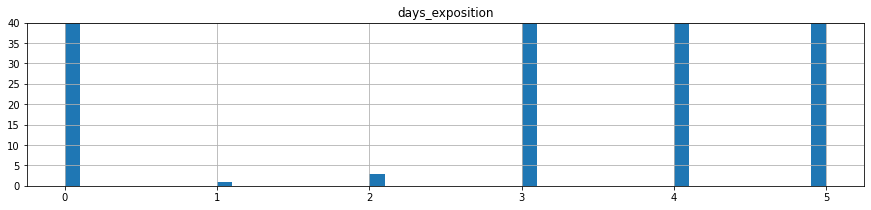

In [85]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

### Посчитайте и добавьте в таблицу новые столбцы

В чистом виде табличные данные некоторых столбцов бесполезны. Их необходимо преобразовать и добавить нужную информацию.

**Цена квадратного метра**

In [86]:
data['price_per_sqm'] = (data['last_price']/data['total_area']).astype('int')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_category,price_per_sqm
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,другой,120370
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,первый,82920
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,другой,92785
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,другой,408176
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,другой,95065
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,другой,99195
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0,другой,110544
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,другой,87454
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,другой,88524
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,другой,127525


Добавлю в таблицу: день недели, месяц и год публикации объявления. 

In [87]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_category,price_per_sqm,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,0,другой,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81,первый,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558,другой,92785,3,8,2015


Добавлю категоризацию этажей


In [88]:
data['floor_category'] = data.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 'другой'), axis=1
)

 Добавлю в таблицу соотношение жилой и общей площади , а также отношение площади кухни к общей.

In [89]:
data['total_kitchen_area'] = data['kitchen_area'] / data['total_area'] 
data['total_living_area'] = data['living_area'] / data['total_area'] 
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,floor_category,price_per_sqm,weekday,month,year,total_kitchen_area,total_living_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,755.0,0,другой,120370,3,3,2019,0.231481,0.472222
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,NaN,81,первый,82920,1,12,2018,0.272277,0.460396
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2.0,574.0,558,другой,92785,3,8,2015,0.148214,0.612500
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,3.0,234.0,424,другой,408176,4,7,2015,NaN,NaN
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,55,другой,95065,0,9,2018,0.299342,0.473684
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.0,NaN,155,другой,99195,3,11,2017,0.386059,0.284182
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,0.0,NaN,0,другой,110544,3,4,2019,0.263966,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,NaN,189,другой,87454,2,5,2018,0.265682,0.465320
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,NaN,289,другой,88524,6,2,2017,0.106557,0.714754
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,2.0,553.0,137,другой,127525,3,11,2017,0.214646,0.512626


Добавлю расстояние от центра города в километрах

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22739 entries, 0 to 23359
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22739 non-null  int64         
 1   last_price            22739 non-null  int64         
 2   total_area            22739 non-null  float64       
 3   first_day_exposition  22739 non-null  datetime64[ns]
 4   rooms                 22739 non-null  int64         
 5   ceiling_height        22739 non-null  float64       
 6   floors_total          22658 non-null  Int8          
 7   living_area           20910 non-null  float64       
 8   floor                 22739 non-null  int64         
 9   is_apartment          22739 non-null  bool          
 10  studio                22739 non-null  bool          
 11  open_plan             22739 non-null  bool          
 12  kitchen_area          20531 non-null  float64       
 13  balcony         

In [91]:
data['citycenters_nearest_km'] = round(data['citycenters_nearest'] /1000 )
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_category,price_per_sqm,weekday,month,year,total_kitchen_area,total_living_area,citycenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,755.0,0,другой,120370,3,3,2019,0.231481,0.472222,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,81,первый,82920,1,12,2018,0.272277,0.460396,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,574.0,558,другой,92785,3,8,2015,0.148214,0.612500,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,234.0,424,другой,408176,4,7,2015,NaN,NaN,7.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,55,другой,95065,0,9,2018,0.299342,0.473684,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,NaN,155,другой,99195,3,11,2017,0.386059,0.284182,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,NaN,0,другой,110544,3,4,2019,0.263966,NaN,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,189,другой,87454,2,5,2018,0.265682,0.465320,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,NaN,289,другой,88524,6,2,2017,0.106557,0.714754,15.0
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,553.0,137,другой,127525,3,11,2017,0.214646,0.512626,14.0


In [92]:
data['citycenters_nearest_km'].describe()

count    17325.000000
mean        14.356883
std          8.548125
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: citycenters_nearest_km, dtype: float64

**Вывод**
Расчитана и добавлена в таблицу недостающая информация.
Необходимо исследовать влияние параметров на цену квадратного метра.

### Проведите исследовательский анализ данных

<AxesSubplot:>

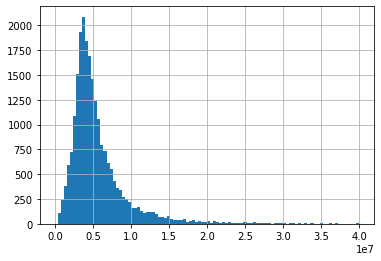

In [93]:
data['last_price'].hist(bins=100,range=(0,40000000))

**Цена квартиры**. График нормальный, только очень длинный хвост в правой части. Это элитная недвижимость

<AxesSubplot:>

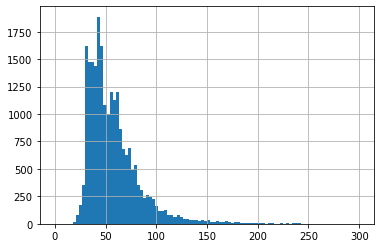

In [94]:
data['total_area'].hist(bins=100,range=(0,300))

**Общая площадь**. На графике видно, что количество квартир снижается когда общая площадь начинает достигать 100 кв. метров.

<AxesSubplot:>

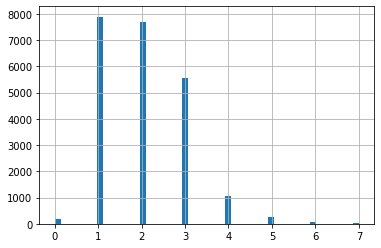

In [95]:
data['rooms'].hist(bins=50,range=(0,7))

**Комнаты**. Больше всего квартир с 1-2 комнаты.

<AxesSubplot:>

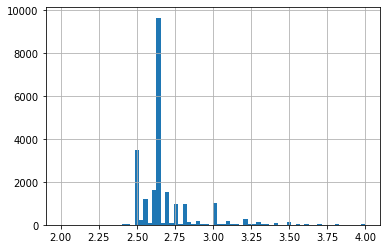

In [96]:
data['ceiling_height'].hist(bins=70,range=(2,4))

In [97]:
data['ceiling_height'].describe()

count    22739.000000
mean         2.687397
std          0.195507
min          2.250000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

Больше всего продаж квартир с высотой потока 2.6 м

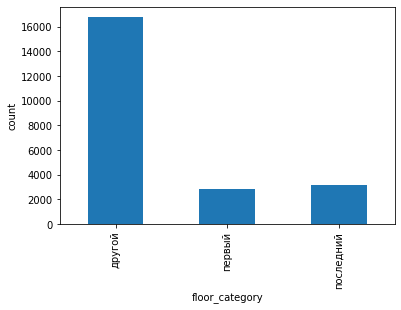

In [98]:
data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count');

Не могу понять почему не показывает последний этаж.(исправил)

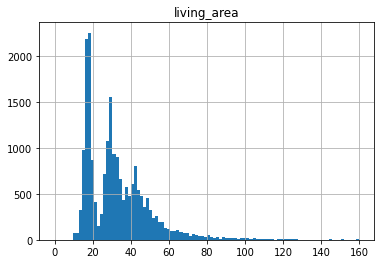

In [99]:
data.hist('living_area', bins=100, range=(0,160));

Жилая зона. Присутвуют 2 пика: на 18 кв. метрах и 30 кв. метрах. Нужно понять почему такой резкий спад на 24 кв. метрах

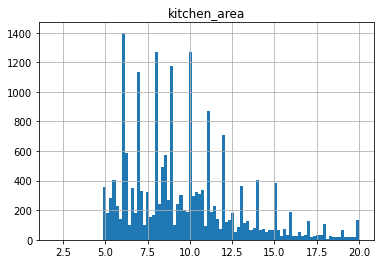

In [100]:
data.hist('kitchen_area', bins=100, range=(2,20));

Кухонная зона. В целом график выглядит как нормальное распределение

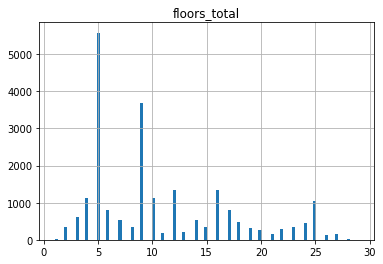

In [101]:
data.hist('floors_total', bins=100);


**Общее количество этажей в доме**. Пик на 5 этажных домах и 9 этажных домах.

**Этаж**. Пик на 2 этажные квартиры.Больше всего квартир с 1-5 этаж.

In [103]:
data['citycenters_nearest_km'].value_counts()

12.0    1578
15.0    1519
13.0    1422
14.0    1247
16.0    1238
        ... 
57.0       1
63.0       1
61.0       1
45.0       1
62.0       1
Name: citycenters_nearest_km, Length: 61, dtype: int64

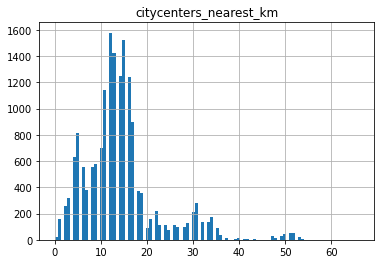

In [104]:
data.hist('citycenters_nearest_km', bins=100);

Подскажите пожалуйста,что случилось с данными,все значения равны нулю,хотя в коде не могу найти из-за чего 

**Близость к центру города**. Два основых пика: на 5км и 13-16 км. Дальше маленькие пики на 21 км и 31 км от центра города.

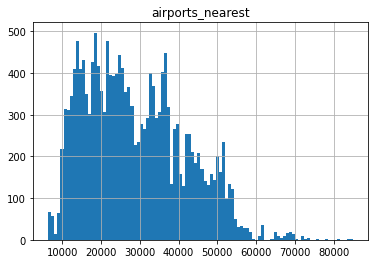

In [105]:
data.hist('airports_nearest', bins=100,);

**Близость к аэропорту**. Основной пик приходится на 19км и 21 км от аэропорта. Поменьше пики на 33 и 37 км от аэропорта.

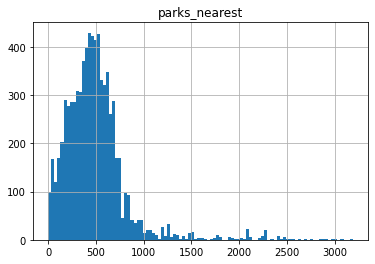

In [106]:
data.hist('parks_nearest', bins=100);

**Расстояние до ближайшего парка**. Если судить по графику, то большинство квартир 400-700 метров от парков.

array([[<AxesSubplot:title={'center':'weekday'}>]], dtype=object)

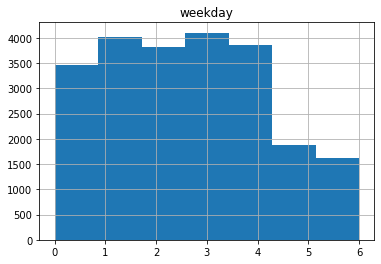

In [107]:
data.hist('weekday', bins=7)

In [108]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_category,price_per_sqm,weekday,month,year,total_kitchen_area,total_living_area,citycenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,0,другой,120370,3,3,2019,0.231481,0.472222,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,81,первый,82920,1,12,2018,0.272277,0.460396,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558,другой,92785,3,8,2015,0.148214,0.612500,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,234.0,424,другой,408176,4,7,2015,NaN,NaN,7.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,55,другой,95065,0,9,2018,0.299342,0.473684,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23355,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,381.0,0,другой,72490,1,3,2017,0.103356,0.547792,4.0
23356,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,45,другой,52542,0,1,2018,0.144068,0.644068,NaN
23357,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,0,первый,44091,6,2,2018,NaN,0.523810,NaN
23358,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,196.0,602,другой,149511,1,3,2017,0.303583,NaN,10.0


**День публикации**. Меньше всего публикаций с 4-6 день недели

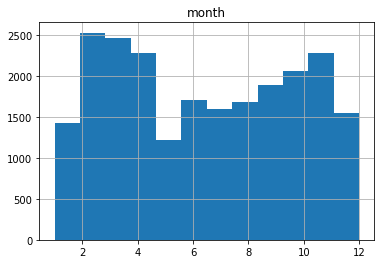

In [109]:
data.hist('month', bins=12);

**Месяц публикации**.  В с мая по июль пониженное кол-во публикаций.

**Исследую время продажи квартир**

<AxesSubplot:>

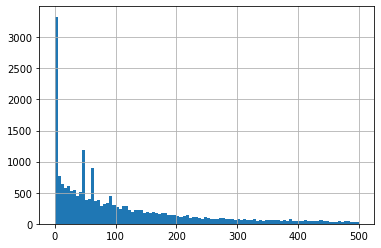

In [110]:
data['days_exposition'].hist(bins=100,range=(0,500))

Больше всего продаж на 50 день.

In [111]:
data['days_exposition'].describe()

count    22739.000000
mean       147.955979
std        191.640092
min          0.000000
25%         23.000000
50%         72.000000
75%        193.000000
max       1095.000000
Name: days_exposition, dtype: float64

In [112]:
print(f'Среднее время продажи квартиры в днях:',round(data['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:',round(data['days_exposition'].median()))

Среднее время продажи квартиры в днях: 148
Медианное время продажи квартиры в днях: 72


In [113]:
print('\n[Выбросы] Количество объявлений, которые сняты через:')
print('45 дней:',data[data['days_exposition'] == 45]['days_exposition'].count())
print('60 дней:',data[data['days_exposition'] == 60]['days_exposition'].count())
print('90 дней:',data[data['days_exposition'] == 90]['days_exposition'].count())


[Выбросы] Количество объявлений, которые сняты через:
45 дней: 871
60 дней: 531
90 дней: 184


Среднее время продажи 150 дней,это почти пол года, в то время как медианное значение равняется 90.
Чтобы лучше описать время продаж использую boxplot()

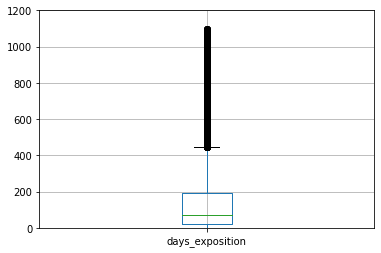

In [114]:
plt.ylim(0,1200)
data.boxplot(column='days_exposition') 
plt.show()

Исследуя гистограмму продаж и диаграмму размаха можно видеть, что среднее время продажи квартиры ,примерно 85 дней. Большая часть значений лежит за диапазоном 420 дней . Это выглядит правдоподобным. Самыми быстрыми продажами можно назвать продажи в течение 45 дней. Самой долгой продажей -170 дней и больше полугода .

**Факторы влияния на стоимость**

In [115]:
list_for_graph = ['total_area',
                   'living_area',
                   'kitchen_area',
                   'rooms',
                   'weekday',
                   'month',
                   'year']

for entry in list_for_graph:
     correlation = data['last_price'].corr(data[entry])
     print(f'Корреляция между last_price и {entry} составляет: {correlation:0.2}')

Корреляция между last_price и total_area составляет: 0.75
Корреляция между last_price и living_area составляет: 0.67
Корреляция между last_price и kitchen_area составляет: 0.53
Корреляция между last_price и rooms составляет: 0.47
Корреляция между last_price и weekday составляет: -0.016
Корреляция между last_price и month составляет: 0.006
Корреляция между last_price и year составляет: -0.039


Построю графики ,чтобы подробно рассмотреть такие факторы как:
Комнаты
Дни недели 
Месяцы
Года

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

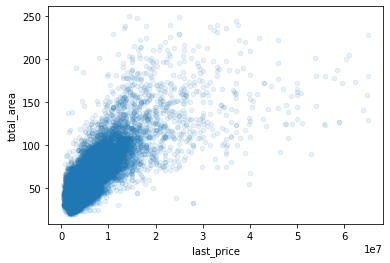

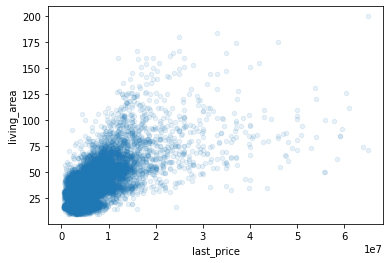

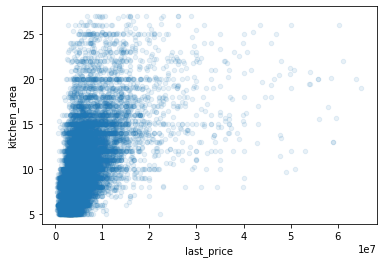

In [116]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1)
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1)

<AxesSubplot:xlabel='rooms'>

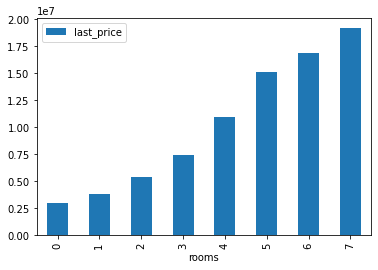

In [117]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar')

<AxesSubplot:title={'center':'median'}, xlabel='weekday'>

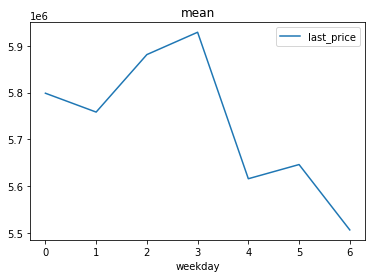

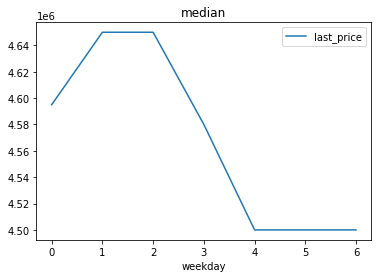

In [118]:
data.pivot_table(index='weekday',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')
data.pivot_table(index='weekday',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

<AxesSubplot:title={'center':'median'}, xlabel='month'>

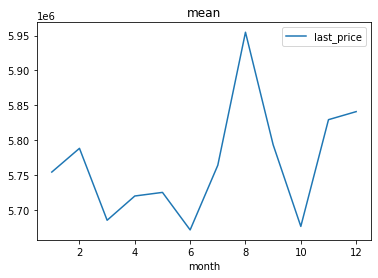

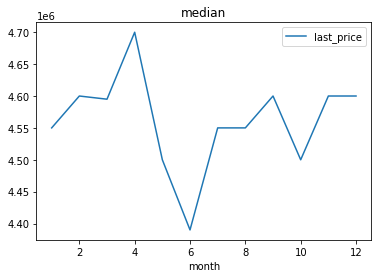

In [119]:
data.pivot_table(index='month',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

<AxesSubplot:title={'center':'median'}, xlabel='year'>

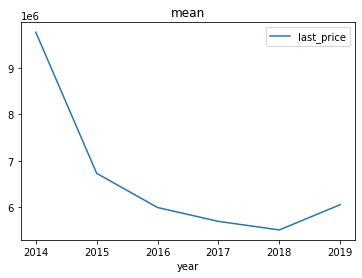

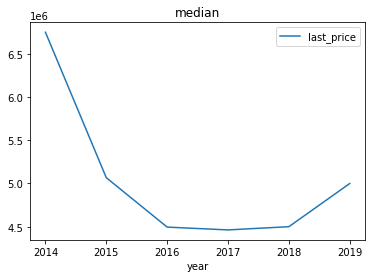

In [120]:
data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')
data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

**Вывод по графикам**

- Самые дорогие квартиры с 6-7 комнатамию
- Самые высокие цены по дням недели наблюдаются в среду и четверг.
- По меясцам самая низкая цена с апреля по июнь , так же есть выбросы в сентябре.
- Цена на квартиры снижалась с 2014 года по 2016. После 2016 года мы видим положительный тренд роста цен квартир. Графики ниже показывают изменение некоторых факторов,которые влияют на изменение цен на квартиры.

<div class="alert alert-info">
  Ниже предоставил графики изменения общей площади по годам
</div>

<AxesSubplot:title={'center':'median'}, xlabel='year'>

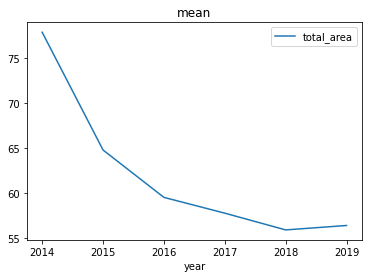

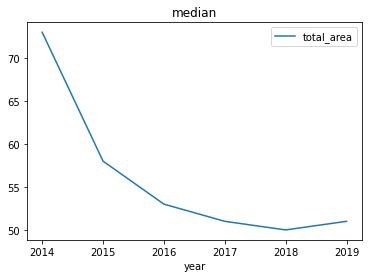

In [121]:
data.pivot_table(index='year',values='total_area',aggfunc='mean').plot(y='total_area', kind='line', title='mean')
data.pivot_table(index='year',values='total_area',aggfunc='median').plot(y='total_area', kind='line', title='median')

<div class="alert alert-info">
  Ниже предоставил графики изменения кухонной зоны по годам
</div>

<AxesSubplot:title={'center':'median'}, xlabel='year'>

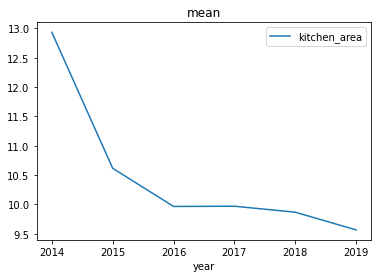

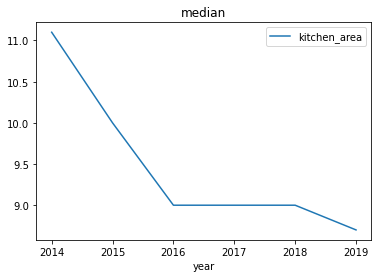

In [122]:
data.pivot_table(index='year',values='kitchen_area',aggfunc='mean').plot(y='kitchen_area', kind='line', title='mean')
data.pivot_table(index='year',values='kitchen_area',aggfunc='median').plot(y='kitchen_area', kind='line', title='median')

<div class="alert alert-info">
  Ниже предоставил графики изменения публикаций по годам
</div>

<AxesSubplot:title={'center':'median'}, xlabel='year'>

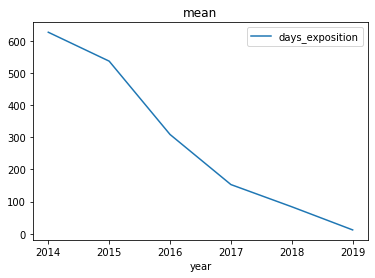

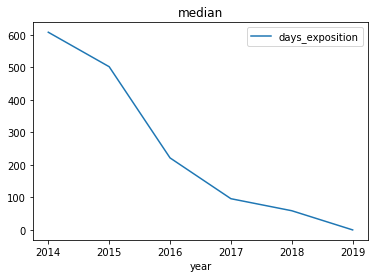

In [123]:
data.pivot_table(index='year',values='days_exposition',aggfunc='mean').plot(y='days_exposition', kind='line', title='mean')
data.pivot_table(index='year',values='days_exposition',aggfunc='median').plot(y='days_exposition', kind='line', title='median')

Рассмотрим динамику цены и площади квартиры


<AxesSubplot:title={'center':'median'}, xlabel='total_area'>

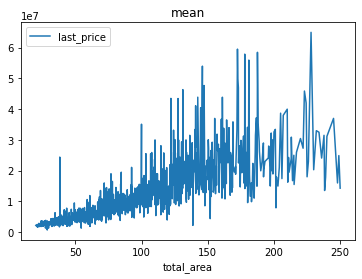

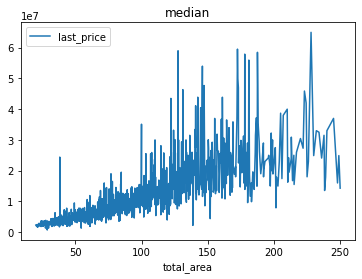

In [124]:
data.pivot_table(index='total_area',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')
data.pivot_table(index='total_area',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

На графике можно заметить довольно логическую ситуацию,что при возрастании площади квартиры ,повышается ее цена.

Цена по убыванию зависит от:

- общей площади
- жилой площади
- площади кухни
- количества комнат.

Цена практически на зависит от:

- этажа, на котором расположена квартира
- даты размещения.

**Исследование цен в населенных пунктах**

<AxesSubplot:xlabel='last_price', ylabel='floor_category'>

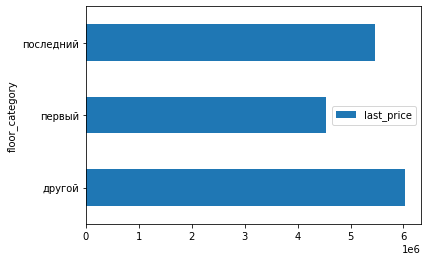

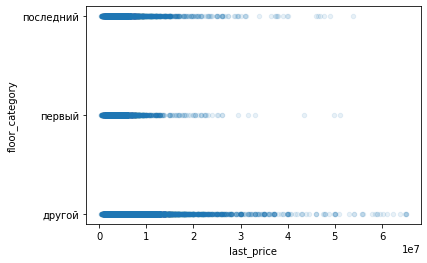

In [125]:
data.pivot_table(index='floor_category',values='last_price').plot(y='last_price', kind='barh');
data.plot(x='last_price', y='floor_category', kind='scatter', alpha=0.1)

Видно ,что квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.

# Добавим ТОП-10 

In [126]:
top_10=data.groupby('locality_name').agg({'price_per_sqm':'mean','days_exposition':'count',}) \
    .sort_values(by = 'days_exposition', ascending = False) \
    .head(10)
top_10
#округлил значения и изменил median на mean

,price_per_sqm,days_exposition
locality_name,,
Санкт-Петербург,111356.711818,14935
поселок Мурино,85605.023723,548
поселок Шушары,78525.062212,434
Всеволожск,68549.717949,390
Пушкин,102621.088825,349
Колпино,75310.336310,336
поселок Парголово,90102.711656,326
Гатчина,68675.543333,300
деревня Кудрово,92589.043919,296


Можем увидеть,что по публикациям лидирует Петербург и цена там примерно 11357 руб за кв.м, а на последнем месте Выборг,у него 57897 руб за кв.м

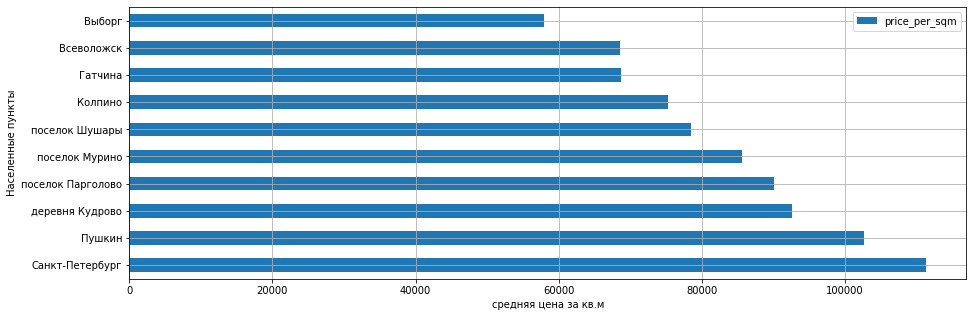

In [127]:
top_10.groupby('locality_name') \
.agg({'price_per_sqm':'mean','days_exposition':'count',}) \
.pivot_table(index='locality_name',
                      values='price_per_sqm',
                      aggfunc='mean') \
.sort_values(by = 'price_per_sqm', ascending = False) \
.plot(grid=True,figsize=(15,5),kind='barh',)
plt.xlabel('средняя цена за кв.м',fontsize=10)
plt.ylabel('Населенные пункты',fontsize=10)                     
plt.show()

In [128]:
#Этот график показывает топ-10 по цене за один кв.м,не учитывая кол-во публикаций
#top_10.pivot_table(index='locality_name',
                      #values='price_per_sqm',
                      #aggfunc='mean').sort_values(by='price_per_sqm',ascending=False).plot(grid=True,figsize=(15,5),kind='barh',)
#plt.xlabel('Населенные пункты',fontsize=10)
#plt.ylabel(' средняя цена за кв.м',fontsize=10)                     
#plt.show()

Этот график показывает ТОП-10 населенных пунктов по средней цене за кв.м и мы видим что в Зеленогорске самый дорогой кв.м(116185 руб) ,а в деревне Кудрово самый дешевый(92589 руб)

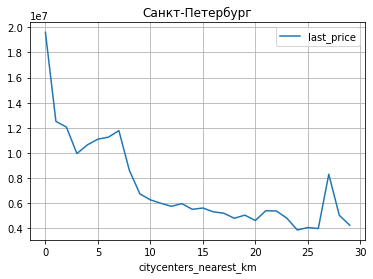

In [129]:
spb = data[['last_price','citycenters_nearest_km','locality_name']]
spb.query('locality_name == "Санкт-Петербург"').pivot_table(index='citycenters_nearest_km',values='last_price',aggfunc='mean')\
    .plot(title='Санкт-Петербург', grid = True)
plt.show()

In [130]:
data.query('locality_name == "Санкт-Петербург" and citycenters_nearest > 26999 and citycenters_nearest < 28000 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_category,price_per_sqm,weekday,month,year,total_kitchen_area,total_living_area,citycenters_nearest_km
734,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,NaN,128,другой,193918,1,11,2017,0.337838,0.405405,27.0
5879,6,2250000,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,NaN,178,последний,70312,1,2,2018,0.218750,0.515625,27.0


Выброс на 27 км ,скорее всего, обьясняется тем,что там супер дорогая недвижимость.

In [131]:
spb_floor = data[['citycenters_nearest','locality_name','floor_category']]
spb_floor['citycenters_nearest'].unique()

array([16028., 18603., 13933., ...,  9167.,  7262.,  6263.])

# 3 КМ

In [132]:
spb_floor_3km=spb_floor.query('locality_name == "Санкт-Петербург" and citycenters_nearest >2999 and citycenters_nearest < 3999 ')
spb_floor_3km

,citycenters_nearest,locality_name,floor_category
35,3502.0,Санкт-Петербург,другой
135,3618.0,Санкт-Петербург,другой
180,3301.0,Санкт-Петербург,первый
200,3369.0,Санкт-Петербург,другой
314,3876.0,Санкт-Петербург,другой
...,...,...,...
23092,3441.0,Санкт-Петербург,первый
23111,3400.0,Санкт-Петербург,другой
23183,3996.0,Санкт-Петербург,другой
23217,3088.0,Санкт-Петербург,последний


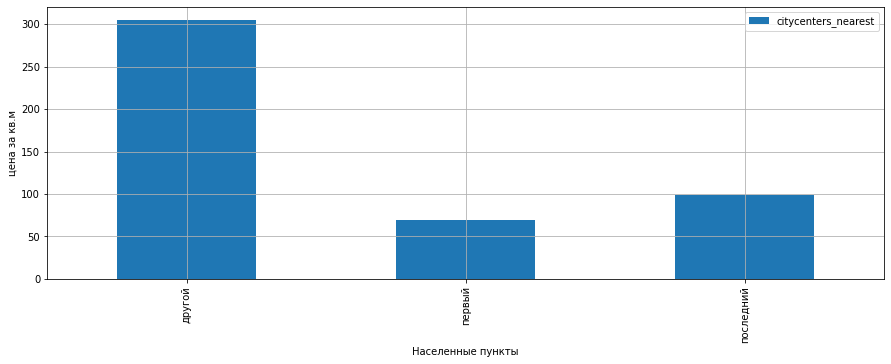

In [133]:
spb_floor_3km.pivot_table(index='floor_category',
                      values='citycenters_nearest',
                      aggfunc='count').plot(grid=True,figsize=(15,5),kind='bar',)
plt.xlabel('Населенные пункты',fontsize=10)
plt.ylabel('цена за кв.м',fontsize=10)                     
plt.show()

In [134]:
spb_floor_3km['floor_category'].value_counts()

другой       305
последний     99
первый        70
Name: floor_category, dtype: int64

In [135]:
print('Доля квартир на первом этаже:', f"{(70/474):.0%}")
print('Доля квартир на последнем этаже:',f"{ (99/474):.0%}")
print('Доля квартир на другом этаже:',f"{ (305/474):.0%}")

Доля квартир на первом этаже: 15%
Доля квартир на последнем этаже: 21%
Доля квартир на другом этаже: 64%


Всего 474 квартиры из них :
- 305 на другом этаже
- 99 на последнем этаже
- 70 на первом этаже

# 5 КМ

In [136]:
spb_floor_5km=spb_floor.query('locality_name == "Санкт-Петербург" and citycenters_nearest >4999 and citycenters_nearest < 5999 ')
spb_floor_5km

,citycenters_nearest,locality_name,floor_category
106,5527.0,Санкт-Петербург,другой
140,5448.0,Санкт-Петербург,последний
233,5700.0,Санкт-Петербург,другой
275,5026.0,Санкт-Петербург,другой
317,5129.0,Санкт-Петербург,другой
...,...,...,...
23173,5908.0,Санкт-Петербург,другой
23198,5294.0,Санкт-Петербург,последний
23249,5223.0,Санкт-Петербург,другой
23286,5749.0,Санкт-Петербург,последний


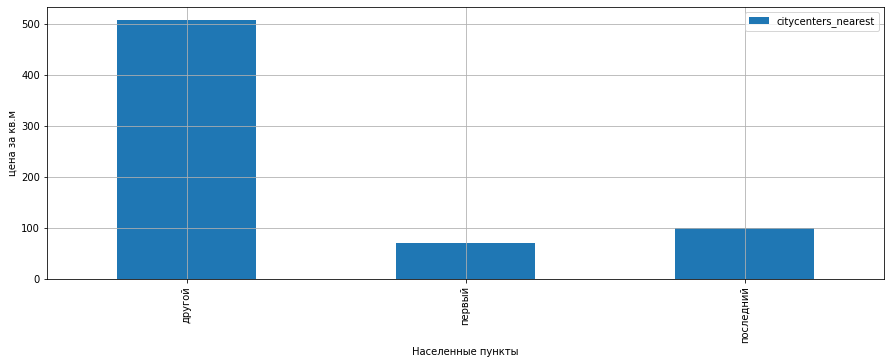

In [137]:
spb_floor_5km.pivot_table(index='floor_category',
                      values='citycenters_nearest',
                      aggfunc='count').plot(grid=True,figsize=(15,5),kind='bar',)
plt.xlabel('Населенные пункты',fontsize=10)
plt.ylabel('цена за кв.м',fontsize=10)                     
plt.show()

In [138]:
spb_floor_5km['floor_category'].value_counts()

другой       508
последний    100
первый        71
Name: floor_category, dtype: int64

In [139]:
print('Доля квартир на первом этаже:', f"{(71/679):.0%}")
print('Доля квартир на последнем этаже:',f"{ (100/679):.0%}")
print('Доля квартир на другом этаже:',f"{ (508/679):.0%}")

Доля квартир на первом этаже: 10%
Доля квартир на последнем этаже: 15%
Доля квартир на другом этаже: 75%


Всего 679 квартир , из них :
- 508 квартир на другом этаже
- 100 на последнем этаже
- 71 на первом этаже

**Микро-вывод по 3 и 5 км** на 3 км и 5 км преобладают квартиры на "другом" этаже, однако на 5 км всего больше квартир и разница квартир по этажам такая:
- Разница квартир первого этажа равна 1
- Разница квартир последнего этажа равна 1
- Разница квартир другого этажа равна 203


# Доля квартир на каждом км

In [140]:
spb_first_floor=spb_floor.query('locality_name == "Санкт-Петербург" and floor_category == "первый"  ')
len(spb_first_floor)

1539

Квартир на первом этаже - 1539

In [141]:
spb_last_floor=spb_floor.query('locality_name == "Санкт-Петербург" and floor_category == "последний"')
len(spb_last_floor)

1760

Квартир на последнем этаже - 1760

In [142]:
spb_other_floor=spb_floor.query('locality_name == "Санкт-Петербург" and floor_category == "другой"')
len(spb_other_floor)

11636

Квартир на последнем этаже - 11636

In [143]:
print('Доля квартир на первом этаже:', f"{(len(spb_first_floor))/(len(spb_first_floor)+len(spb_last_floor)+len(spb_other_floor)):.0%}")
print('Доля квартир на последнем этаже:',f"{ (len(spb_last_floor))/(len(spb_first_floor)+len(spb_last_floor)+len(spb_other_floor)):.0%}")
print('Доля квартир на другом этаже:',f"{ (len(spb_other_floor))/(len(spb_first_floor)+len(spb_last_floor)+len(spb_other_floor)):.0%}")

Доля квартир на первом этаже: 10%
Доля квартир на последнем этаже: 12%
Доля квартир на другом этаже: 78%


- С большим отрывом по цене лидирует недвижимость до 7 км.
- После 8 км цены идут на понижение
- Видим пик на 27км, это элитная недвижимость по цене сравнимая с квартирами на 8 км.
- Видим ,что доля квартир на другом этаже лидирует,значит квартиры на первом и последнем этаже не пользуются спросом.
- Цена на квартиры зависит от расстояния до центра,чем дальше ,тем меньше стоимость, но бывают и исключения ,как квартира на 27 километре,значит цены так-же зависят,от статуса и территориального расположения района,возможно квартира на 27 километре,как раз находится в элитном , частном районе.

### Общий вывод

In [144]:
#data

После изучения данных можно сказать, что можно работать с таблицами, в которых встречаются пропущенные значения. Данные всё-таки лучше очищать от явных "выбросов", но возможно чистить данные придётся после этапа исследовательского анализа данных. В нашем примере - это дорогие квартиры, которые портили корреляции и графики зависимости полной стоимости от разных параметров. Из необычных особенностей:

В датафрейм добавлены новые показатели:
- отношение кухни и жилой площади к общей площади помещения
- цена за кв метр
- день, месяц и год публикации объявлений
- категория этажа.

В 27 км от центра Санкт-Петербурга есть дорогостоящая недвижимость. ;
В ТОП-10 входят в основном ближайшие к Санкт-Петербургу города и самые крупные города области:


**ТОП-10** населенных пунктов по кол-ву публикаций и цене за кв.м

| Название населенного пункта  | Цена за кв.м   | Кол-во публикаций |
| -------           | --------   | -------|
| Санкт-Петербург   | 11357 руб  | 2214019|
| поселок Мурино    | 85605 руб  | 78795  |
| Всеволожск        | 68550 руб  |64126  |
| поселок Шушары    | 78525 руб  |61503  |
| Пушкин            | 102621 руб |55741  |
| деревня Кудрово   | 92589 руб  |52862  |
| Гатчина           | 68676 руб  |49469  |
| поселок Парголово | 90103 руб  |45510  |
| Колпино           | 75310 руб  |42849  |
| Выборг            | 57897 руб  |36184  |

Цена в основном зависит от площади квартиры, но корреляция с этажностью(не первый и не последний) видна на графике.
Таких квартир явно больше и они явно дороже.
Самыми быстрыми продажами можно назвать продажи в течение 45 дней. Самой долгой продажей -170 дней и больше полугода .
Выбросы Количество объявлений, которые сняты через:
- 45 дней: 871
- 60 дней: 531
- 90 дней: 184

**Итоги**
- На стоимость квадратного метра квартиры больше всего влияют: общая площадь, этажность, расстояние до центра и год публикации.
- Незначительно на стоимость квадратного метра влияют день, месяц и кол-во комнат. 
- Центром Петербурга можно считать квартиры, находящиеся в радиусе 7 км.Разница между общим датасетом и квартирами в центре СПб различается